<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/Equivalent_Width_Spectroscopy_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching for Europium using Stellar Spectroscopy
This activity allows students to explore how to find the relative abundance of a given element using the spectral features in starlight. The spectra used here were collected by teacher team in the summer of 2019 at McDonald Observatory using the Sandiford Echelle Spectrograph attached to the 2.1 meter Otto Struve Telescope. 

These spectra are part of a larger project to collect data on evolved sun-like stars with low abundances of the lanthanide elements. For more information on this class of stars, see the [PASTEL catalog](https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=B/pastel) and the original paper on the PASTEL catalog [doi: 10.1051/0004-6361/201014247](http://doi.org/10.1051/0004-6361/201014247).

# Using a Google Colab
This assignment combines a document and code into one thing. This system is based on the stand-alone Jupyter Notebook system but is running on Google Drive. Google calls this the Google Colab Notebook. We write text, equations, and such but also run blocks of Python code all together or individually.

Go ahead and double click the code block below and change the message. Don't remove the single quotes (`' '`) around your message.

In [ ]:
# This is Python block

# Here is a variable.
message = 'Hello World!'

# This line of Python will print the message when you hit the play button.
print(message)

Hello World!


## Who are you?
This is a text block. It allows you to write text but doesn't run Python code. Go ahead and put all your information in this block so we know who is completing the assignment.

**Double click here and put your name (s), the date, and course information.**

Answer:

# Spectroscopy

<img src="https://openstax.org/resources/463dc6b891027044760b893bb856330b227362a5" width="640"/>

Light from objects in space can tell us a lot about the object. If we use that light to do spectroscopy, we can determine the temperature of the object, the nature and speed of its motion, and we can find out what its made of. We are exploring the chemical makeup of some stars in this project.

If you need some background on what a spectrum is and what it can do for astronomers, check out this [link](https://openstax.org/books/astronomy/pages/5-3-spectroscopy-in-astronomy).

## Question 0
**Double click here to answer. How does a spectrometer or spectrograph turn starlight into colors? You can use the link above for a hint.**

Answer: 

## The Sandiford Echelle Spectrograph

The spectra we are analyzing were collected using the historic Otto Struve Telescope at McDonald Observatory with the Sandiford Echelle Spectrometer.

<img src="https://i1.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/12/IMG_2079-scaled.jpeg" width="640" />

## What is a spectrum?
This is the spectrum of a star. The y-axis represents the amount of light and the x-axis represents the wavelength of the particular feature. Spectroscopy can tell us objects in space. For instance, using nothing more than the light from the star and some math, you can get a sense of the relative amount of a particular element in a star's atmosphere by looking at the absorption line. That is what we are doing today.

<img src="https://i0.wp.com/jimmynewland.com/astronomy/pastel/iraf-hd141531.png" width="640" />

When one star has more of an element in its atmosphere than another, the absorption line or dips in in the light will be deeper because those atoms took some of the light leaving the star and absorbed it so those photons won't make it to us.

For our data, the units are a really strange. Flux is a unit of power which is energy per time unit. Here the our flux is relative which means 1.0 would be brightest part of the light from the star and the dips are where the light is less bright because it is being absorbed. Notice the brightness varies by wavelength. That is how we are able to look for the signature of particular elements. Specific elements absorb star light at only specific wavelengths. The dips are the fingerprints of the element.

You will use code to analyze some absorption features for a few stars. We are looking for the atoms nickel and europium.

# Searching for Europium

Elements beyond lithium on the periodic table are produced by stars. Some of the heaviest elements come from the most awesome stellar explosions. Supernovae and kilonovae can make lots of the heavy atoms all at once. After the debris from those explosions get swept up in new stars, these atoms can be found floating around in the newer star.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Nucleosynthesis_periodic_table.svg/2880px-Nucleosynthesis_periodic_table.svg.png" width=640 />

These spectra we are analyzing here are part of a stellar survey looking for the presence of the lathanide elements. One element, europium, has a signature that can seen using spectroscopy.

<img src="https://i2.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/12/Screen-Shot-2019-12-29-at-11.30.51-AM.png?resize=768%2C459&ssl=1" width=640 />

5 stellar spectra are stored in a Google spreadsheet and you are going to use code to access, analyze, and plot the data. You will compare how much europium these stars have by using the nickel absorption line as a measuring stick.

# Allowing your code to access your Google Drive
Start by saving a copy of the [data from the spreadsheet](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvozaTH8wjxtIfXuS3cxDlypNQVePOHltom1jmJosvPWdLVD3daMIAFGZ_H9-COOe9W8RJMzJS2B8c/pubhtml) to your own Google Drive. If you are doing this as a group, make sure the person with the copy of the data shares access with everyone in the group so everyone can access the data.

Click the run icon for ***each*** block of code to make it run.

The block below asks you to click and link and copy and paste a verification code to allow your code to access your Google Drive so we can open the spreadsheet containing all the data for our target stars.

In [ ]:
# Allow for access to Google Sheets dataset
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

**_Be sure to replace the Google Sheets URL with a link to your copy of the spreadsheet._**

In [ ]:
# Put the URL for your copy of the Google Sheet here.
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ns1t3TZBdeFexAfBa6DVSUkqKW6g7Gz2I48RrMmRwbM/edit#gid=1134205444')

# Installing SpecUtils

This step imports a spectroscopy library into Google Colab. It's possible that you will need to select the menu item ***`Runtime->Restart and Run All`*** after this step finishes for the first time. This is only true when you first start the workbook. Yes it is annoying.

In [ ]:
# Install SpecUtils usin pip
!pip install specutils

# Importing NumPy and MatPlotLib

The *import* step is different than installing. Here libraries already a part of Google Colab are made available to this workbook.

In [ ]:
# NumPy is a common library for handling mathy things.
import numpy as np

# SciPy allows for things like interpolation and curve fitting.
from scipy.interpolate import make_interp_spline, BSpline

# MatPlotLib is the most common way to visualize data in Python.
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

# MatPlotLib tools for drawing on plots.
import matplotlib.transforms as mtransforms
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [ ]:
# AstroPy allows Python to perform common astronomial tasks.
from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()
from astropy.utils.data import download_file

#### ***If you get an error here the first time after installing specutils, select the 'Runtime->Restart and run all' menu item and try again.***

In [ ]:

# Here we access the parts of specutils we'll need.
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import fwhm

# Copying the Data into Your Code

Each sheet in the spreadsheet contains the data for one star.  Use the example for opening the first sheet to open all 5. When we plot a spectrum, the wavelength values are plotted along the x-axis and the flux or amount of light from the star is plotted along the y-axis. The data from sheet1 is stored in 2 lists. One is called **`wave1`** and contains the wavelengths for the x-axis stored as Angstroms. The other is called **`flux1`** and contains the data for the y-axis. The last variable you need for each star is a name to use a label. You can see **`label1`** is the string **`'HD141531'`**

The star names are:
*   **`HD141531`**
*   **`HD165195`**
*   **`TYC5562-00446-1`**
*   **`TYC5701-00197-1`**
*   **`V*SX_Her`**

**Double click the code block to edit it and write the code for the other stars.**



In [ ]:
sheet = wb.worksheet('sheet1')
data = np.array(sheet.get_all_values()[1:])
data = data.astype(np.float)
wave1 = data[:,0]
flux1 = data[:,1]
label1 = 'HD141531'

# Put the code to fill the other wave, flux, and label variables here

## Question 1
**Double click to answer the question. If these spectra run from 6643 Å to 6646 Å, what color from the visible spectrum would the light appear? You can assume the visible spectrum runs from 300 nm to 700 nm. Note: 10 nm = 1 Å.**

Answer:



# Plotting the Spectrum of Each Star

In [ ]:
"""
  This function interpolates a spectrum to make them smoother when plotting. 
  You won't need to change anything here but you will need to run the block
  so the notebook learns this function and can use it later.
"""
def interp(w, f):
  wInterp = np.linspace(w.min(),w.max(), 300) 
  spl = make_interp_spline(w, f)
  fInterp = spl(wInterp)
  return wInterp, fInterp

Add the interpolation step for the other stars using the variable names from your block above. Note the strange Python syntax on the left of the <code>**=**</code> symbol. The interp functions returns 2 chunks of data and not just one. This is called a tuple. Cool but weird.
Also, the <code>**=**</code> does **not** do the same thing here as it does in algebra!

**Double click the code blocks to edit them and write the code for the other stars.**

In [ ]:
# Interpolate the data for smoother plots
wave1, flux1 = interp(wave1,flux1)

In [ ]:
# Add units to the fluxes and wavelengths
flux1 = flux1*u.Unit('erg cm-2 s-1 AA-1') 
wave1 = wave1*u.AA

You will use the common MatPlotLib library to plot all five stars on the same set of axes. The like **`ax.plot(wave1, flux1, label=label1)`** tells the axis object to plot **`wave1`** on the x-axis and **`flux1`** on the y-axis and to use **`label1`** in the legend.

Go ahead and add **`ax.plot(<...>)`** lines for the other stars and run the block. If all goes well, the 5 stellar spectra should be all plotted together with each star name displayed by color in the legend.

**Double click the code block to edit it and write the code for the other stars.**

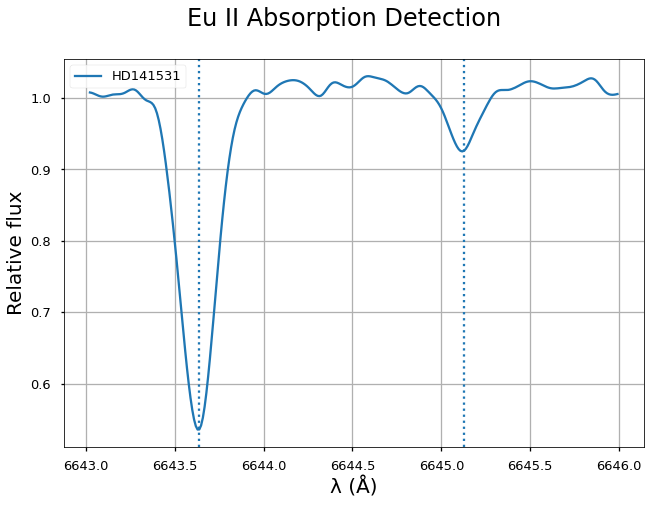

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('Eu II Absorption Detection', fontsize='24')

# Add the other plots here
ax.plot(wave1, flux1, label=label1)

# This displays 2 lines to mark Ni I and Eu II line locations.
plt.axvline(x=6645.127,ls=':')
plt.axvline(x=6643.638,ls=':')

# This labels the x-axis and y-axis
plt.xlabel('λ (Å)',fontsize='20')
plt.ylabel('Relative flux', fontsize='20')

# Display a grid
plt.grid(True)

# Turn on the legend.
ax.legend(loc='best')

# Display all the things we've setup.
plt.show()

## Question 2
**Double click to answer the question. What features do you see for the spectra? How many major features do you sees? How are spectra similar and how are they different? Remember to describe how the plots are shaped relative to one another.**

Answer: 

## Question 3
**Double click to answer the question. What do the dips represent? What does the wavelength of the lowest point in the dip represent? Hint: think how this is related to how a hydrogen atom can emit and absorb certain photons.**

Answer: 

Hint: [How do spectral lines form?](https://openstax.org/books/astronomy/pages/5-5-formation-of-spectral-lines)

# Determining atomic abundance: Equivalent Width

We can measure how much of a particular element is in a star using spectroscopy. We plot the spectrum and find a particular absorption feature associated with a particular element. Then we can use a clever approximation o get a sense of the amount of the element present. The approximation is called the equivalent width. The equivalent width calculation is fairly simple geometry that comes from some [very complicated stellar physics and chemistry](http://research.iac.es/congreso/itn-gaia2013/media/Primas2.pdf).

$ W_{\lambda}\propto\ Nhf\lambda^2 $

The equivalent width $ W_{\lambda} $ varies as the number of atoms of that element, $ N $.

## Making the EW rectangle: Full-Width at Half Max

This code block hightlights the EW rectangle. Just run this block and don't edit anything. The results of the code are explained below.

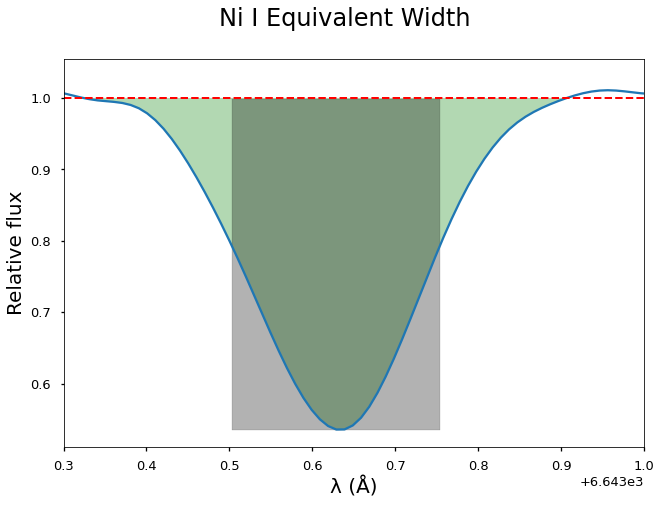

In [ ]:
# Plot one of our stars and annotate the equivalent width.
fig2, ax2 = plt.subplots()
fig2.suptitle('Ni I Equivalent Width', fontsize='24')

ax2.plot(wave1, flux1)

plt.xlabel('λ (Å)',fontsize='20')
plt.ylabel('Relative flux', fontsize='20')

ax2.set_xlim([6643.3,6644])

# Fill in the area under the curve and overlay a rectangle of equal area.
# Green area
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax2.fill_between(wave1, 1, flux1, where=flux1 < 1*u.Unit('erg cm-2 s-1 AA-1'), 
                 facecolor='green', interpolate=True, alpha=0.3)
# Dark gray area.
ax2.add_patch(plt.Rectangle((.29, .045), .358, 0.85, ec='k', fc="k",
                            alpha=0.3,  transform=ax2.transAxes))

plt.axhline(y=1,ls='--',color='red',lw=2)

plt.show()

In order to find the equivalent width, you'll need to find the full-width at half-max (FWHM). Notice the inverted bell-curve shape in the absorption line for Nickel. Since the curve is upside down for our absorption region, we need to find the minimum y-value. That looks like around 0.45 below the flux axis. If we divide by 2 we get the half-max of 0.225 below 1. You can see the blue flux curve must go through this y-value twice. Once on the left at around 6643.5 Å and again on the right at around 6643.75 Å. The EW is then

$$ EW = (6643.75Å-6643.5Å)(0.45) $$ 
$$ = (0.25)(0.45)=112.5mÅ $$

### _The equivalent width is the area of rectangle that is **FWHW** wide by "**max absorption**" high. This area is almost exact the same as the area under the curve between 1 and the flux curve._

## Question 4
**Double click to answer the question. Choose of the plots you made and estimate by eye the equivalent width for the Ni I line near 6643 Å. You need to estimate the depth of the curve below 1. Then divide that by 2 and find the left and right wavelengths where the curve has that same flux below 1. Multiply these numbers. The units are Å since the flux here is relative and has no units.**

Answer: 
* What star did you choose?  
* What is the max absorption below 1? 
* What is the half-max? 
* At what 2 wavelengths does the flux curve pass through the half-max point? 
* What is the equivalent width?
(left wavelength - right wavelength)*(maximum absorption below 1)

## Question 5
**Double click to answer the question. Choose one of the plots you made and estimate the equivalent width for the Ni I line near 6643 Å. You need to estimate the depth of the curve below 1. Then divide that by 2 and find the left and right wavelengths where the curve has that same flux below 1. Multiply these numbers. The units are Å since the flux here is relative and has no units.**

Answer: 
* What star did you choose?  
* What is the max absorption below 1? 
* What is the half-max? 
* At what 2 wavelengths does the flux curve pass through the half-max point? 
* What is the equivalent width?
(left wavelength - right wavelength)*(maximum absorption below 1)

## Finding the Equivalent Width with SpecUtils

Here you are creating a spectrum from each star's flux and wavelength axis. This means you can use SpecUtils to determine the equivalent width for Ni I near 6643 Å and for Eu II near 6645 Å.

**Double click the code blocks to edit them and write the code for the other stars.**

In [ ]:
spec1 = Spectrum1D(spectral_axis=wave1, flux=flux1)

Add code to find the EW for Ni an Eu and also the ratio of Eu/Ni.

In [ ]:
# Calculate the EW of Ni I and Eu II in their specific spectral regions.
ni1 = equivalent_width(spec1, regions=SpectralRegion(6643.0*u.AA,6644*u.AA))
eu1 = equivalent_width(spec1, regions=SpectralRegion(6645.0*u.AA,6645.5*u.AA))
r1 = eu1/ni1

# Rounding
ni1 = np.round(ni1,3)
eu1 = np.round(eu1,3)
r1 = np.round(r1,3)

# Print the EW or Ni I, Eu II, and their ratio.
print('EW Ni I 6643A\tEW Eu II 6645 A\tEu/Ni\tName') # Print a header row
print(str(ni1)+'\t'+str(eu1)+'\t'+str(r1)+'\t'+label1) # Print for target 1

EW Ni I 6643A	EW Eu II 6645 A	Eu/Ni	Name
0.1 Angstrom	-0.001 Angstrom	-0.007	HD141531


## Question 6
**Double click here to answer. Compare your calculation done by hand to that done by the code. Were you close? Why would we compare the 2 calculations? What could cause the calculation by hand and that from the computer to be different?**

Answer:

# Stellar Nucleosythesis

![https://physics.aps.org/articles/v9/s66](https://physics.aps.org/assets/96e56287-2b25-482b-b075-894adc7b2b10/es66_1.png)

Heavy elements can be formed when neutrons smash into existing elements. The result is a left over proton in the nuclues. Adding a proton to a nucleus means you changed from atom to another. There are 2 types of stellar events that cause the rapid formation of elements: stellar explosions like a supernova and stellar mergers.

## Neutron Capture r-process & s-process
In 2017 astronomers observed a neutron star merger or kilonova. This event was so explosive and energetic that scientists observed the gravitational waves from the event. This type of merger is now thought to be the source of many heavy elements. Stellar explosions can cause rapid neutron capture or the r-process. 

Sometimes a random neutron inside a star slams into a nucleus and makes a heavier element. This process is rare so it takes a long time to build up an element this way. That's why it's called the slow or s-process. 

Europium is thought to mainly come from the r-process, although some europium comes from the s-process.
<img src="https://i0.wp.com/www.jimmynewland.com/wp/wp-content/uploads/2019/12/image.png?w=667&ssl=1" width=640 />

## Question 7
**Double click here to answer. If our target stars have comparable amounts of nickel, what measure should you use based on the results from the code? Rank the stars from most europium detected to least europium detected.**

Answer:

## Question 8
**Double click here to answer. These stars all have very similar properties like mass and temperature. Why do they have varying amounts of europium? You should be able to list 3 physical processes by which europium atoms ended up in these stars.**

Answer: 

# HR Diagram
Astronomers use the Hertzsprung-Russell Diagram to compare groups of stars and to look for patterns.
<img src="https://openstax.org/resources/dd3b626194347b820b300c0437928fdb31869efd" width="640" />

Here is a classic example of an HR diagram with some of the known groupings labeled.

If you need a refresher on the HR diagram, take a look [here](https://openstax.org/books/astronomy/pages/18-4-the-h-r-diagram#OSC_Astro_18_04_Sample)

![HR Diagram](http://www.jimmynewland.com/wp/wp-content/uploads/2020/08/Screen-Shot-2020-08-12-at-5.07.18-PM.png)

Here is an HR diagram of some of the nearest stars with our sun and out targets stars also plotted. The main sequence is the grouping of stars running from upper left to lower right and the red giant branch runs from the main sequence off to the upper right.

## Question 9
**Double click here to answer. Using the HR diagram, can you put the results of the EW measurements in context? Are all the targets the same age? What role could the s-process have for these stars?**

Answer:

# Wrapping up

That's it! Congrats on using code to explore an application of spectroscopy. Feel free to save a copy and explore the code further.

**Be sure and save this completed notebook in your drive and be sure to share it with your instructor!**

## Share and share alike!
This activity was written by J. Newland and is meant to be shared. If you remix this work, let me know.
[Reach out for comments or questions.](https://jimmynewland.com)

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

